In [3]:
# input functions
# data reading function
# noise function
# method functions
# system selection
# error calc
# save

In [4]:
import numpy
from matplotlib import pyplot as plt
import pandas
import random
import statsmodels.api as sm
import timeit

In [24]:
# inputs

def step(t, par):
    i = par
    if t<i:
        return 0
    else:
        return 1
    return numpy.concatenate((numpy.array([0 for i in range(s)]), numpy.array([1 for i in range(l)])), axis=None)

def rect(t, par):
    i, f = par
    if t>=i and t<f:
        return 1
    else:
        return 0
#     return numpy.concatenate((numpy.array([0 for i in range(s)]), numpy.array([1 for i in range(l)]), numpy.array([0 for i in range(f)])), axis=None)

def doublet(t, par):
    i, f1, f2 = par
    if t>=i and t<f1:
        return 1
    elif t>=f1 and t<f2:
        return -1
    else:
        return 0
#     return numpy.concatenate((numpy.array([0 for i in range(s)]), numpy.array([1 for i in range(l1)]), numpy.array([-1 for i in range(l2)]), numpy.array([0 for i in range(f)])), axis=None)

In [6]:
# read data

def read(file):
    df = pandas.read_csv(file)
    ydata = df.y.values - df.y[0]
    udata = df.u.values - df.u[0]
    tdata = df.t.values
    return [ydata, udata, tdata]


In [7]:
#  noise

def uniform_noise(data, m): #currently does not include 1
    ydata, udata, t = data
    noise = [random.uniform(-1,1)*m for i in range(len(ydata))]
    noisy = ydata + noise
    return noisy

def pseudo_noise(data, m): #currently only returns int values
    ydata, udata, t = data
    noise = [random.randrange(start=-1,stop=1)*m for i in range(len(ydata))]
    noisy = ydata + noise
    return noisy


In [8]:
# methods

# time series
# ARMAX
def ARMAX(data):
    ydata, udata, t = data
    start = timeit.default_timer()
    ARMA_results = sm.tsa.ARMA(ydata, order=(2,1), exog = udata).fit()
    y_armax = ARMA_results.predict(0, len(t)-1, udata) + ydata[0]
    end = timeit.default_timer()
    runtime = end - start
    return y_armax, runtime

# ARX
def ARX(data):
    ydata, udata, t = data
    start = timeit.default_timer()
    ARX_results = sm.tsa.AR(ydata).fit()
    y_arx = ARX_results.predict()
    end = timeit.default_timer()
    runtime = end - start
    t_arx = time[:len(y_arx)]
    return y_arx, runtime

# model based
# DE
def DE(bounds, func):     
    start = timeit.default_timer()
    coeff = scipy.optimize.differential_evolution(func, bounds).x
    end = timeit.default_timer()
    runtime = end - start
       
    return coeff, runtime

# Least Squares
def LSTSQ_rt_coeffs(ig, func): #ig = initial guess \\
    start = timeit.default_timer()
    coeff = scipy.optimize.least_squares(func, ig).x
    end = timeit.default_timer()
    runtime = end - start
       
    return coeff, runtime

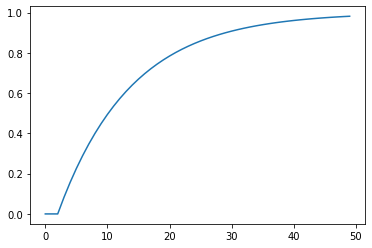

In [30]:
# system

def FO(u, mv, uv, l):
    K, tau = mv
    ts = numpy.linspace(0,l)
    dt = ts[1]
    y = 0
    ys = []
    for t in ts:
        dydt = -1/tau*y + 1/tau*u(t, up)
        y += dydt*dt
        ys.append(y)
    return ys

plt.plot(FO(step, [1, 5], [1], 20))

# or other possibilities:
# -using scipy.signal.lsim and list of us and ts
# -convert to statespace and integrate
# -control.forced response

In [10]:
# error

def err(data, pred):
    ydata, udata, t = data
    errors = ydata - pred
    return errors

In [31]:
# save
def save_data(data, save_name):
    df = pandas.DataFrame(data, columns=['y','u','t'])
    df.to_csv(save_name)
    return None

In [32]:
def estimate(model, tech, u):
    














